In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
# Check the Python version
import sys
if sys.version.startswith("3."):
  print("You are running Python 3. Good job :)")
else:
  print("This notebook requires Python 3.\nIf you are using Google Colab, go to Runtime > Change runtime type and choose Python 3.")

You are running Python 3. Good job :)


In [3]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
if IN_COLAB:
  # Clone the entire repo to access the files.
  !git clone -l -s https://github.com/epfml/OptML_course.git cloned-repo
  %cd cloned-repo/labs/ex02/template/

# Load the data

In [31]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
b, A = build_model_data(x, weight)

In [32]:
b.shape, A.shape


((10000,), (10000, 2))

# Least Squares Estimation
Least squares estimation is one of the fundamental machine learning algorithms. Given an $ n \times d $ matrix $A$ and a $ n \times 1$ vector $b$, the goal is to find a vector $x \in \mathbb{R}^d$ which minimizes the objective function $$f(x) = \frac{1}{2n} \sum_{i=1}^{n} (a_i^\top x - b_i)^2 = \frac{1}{2n} \|Ax - b\|^2 $$

In this exercise, we will try to fit $x$ using Least Squares Estimation. 

One can see the function is $L$ smooth with $L = \frac1n\|A\|^2$ (Corollary 2.5).

# Computing the Objective Function
Fill in the `calculate_objective` function below:

In [33]:
def calculate_objective(Axmb):
    """Calculate the mean squared error for vector Axmb = Ax - b."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute mean squared error
    # ***************************************************
    return np.mean(Axmb**2)/2

# Compute smoothness constant $L$

To compute the spectral norm of A you can use np.linalg.norm(A, 2)

In [34]:
def calculate_L(b, A):
    """Calculate the smoothness constant for f"""
    eig = np.linalg.eigvals(A.T.dot(A))
#     norm = np.linalg.norm(A, 2)
    L = max(eig)/(A.shape[0])
#     L = norm/A.shape[0]
    return L

# Gradient Descent

Please fill in the functions `compute_gradient` below:

In [35]:
def compute_gradient(b, A, x):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and objective
    # ***************************************************
    Axmb = A.dot(x) - b
    grad = A.T.dot(Axmb)/len(Axmb)
    return grad, Axmb

Please fill in the functions `gradient_descent` below:

In [36]:
def gradient_descent(b, A, initial_x, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store x and objective func. values
    xs = [initial_x]
    objectives = []
    x = initial_x
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and objective function
        # ***************************************************
        grad, Axmb = compute_gradient(b,A,x)
        obj = calculate_objective(Axmb)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update x by a gradient descent step
        # ***************************************************
        x = x - gamma*grad
        # store x and objective function value
        xs.append(x)
        objectives.append(obj)
        print("Gradient Descent({bi}/{ti}): objective={l}".format(
              bi=n_iter, ti=max_iters - 1, l=obj))

    return objectives, xs

Test your gradient descent function with a naive step size through gradient descent demo shown below:

In [37]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50

gamma = 0.1

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_objectives_naive, gradient_xs_naive = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): objective=2792.2367127591674
Gradient Descent(1/49): objective=2264.6350560300034
Gradient Descent(2/49): objective=1837.2777140793803
Gradient Descent(3/49): objective=1491.1182670993758
Gradient Descent(4/49): objective=1210.7291150455721
Gradient Descent(5/49): objective=983.613901881991
Gradient Descent(6/49): objective=799.6505792194903
Gradient Descent(7/49): objective=650.6402878628646
Gradient Descent(8/49): objective=529.941951863998
Gradient Descent(9/49): objective=432.1762997049161
Gradient Descent(10/49): objective=352.9861214560597
Gradient Descent(11/49): objective=288.842077074486
Gradient Descent(12/49): objective=236.88540112541116
Gradient Descent(13/49): objective=194.80049360666067
Gradient Descent(14/49): objective=160.71171851647273
Gradient Descent(15/49): objective=133.09981069342055
Gradient Descent(16/49): objective=110.73416535674828
Gradient Descent(17/49): objective=92.61799263404367
Gradient Descent(18/49): objective=77.94389272865

Time Visualization

In [38]:
%matplotlib inline

In [39]:
from ipywidgets import IntSlider, interact
from grid_search import *

def plot_figure(n_iter):
    # Generate grid data for visualization (parameters to be swept and best combination)
    grid_x0, grid_x1 = generate_w(num_intervals=10)
    grid_objectives = grid_search(b, A, grid_x0, grid_x1)
    obj_star, x0_star, x1_star = get_best_parameters(grid_x0, grid_x1, grid_objectives)
    
    fig = gradient_descent_visualization(
        gradient_objectives_naive, gradient_xs_naive, grid_objectives, grid_x0, grid_x1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_xs_naive)));

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

Try doing gradient descent with a better learning rate

In [40]:
# Define the parameters of the algorithm.
max_iters = 50

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: a better learning rate using the smoothness of f
# ***************************************************
L = calculate_L(b, A)
gamma = 1/L

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_objectives, gradient_xs = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): objective=2792.2367127591674
Gradient Descent(1/49): objective=15.3858878688294
Gradient Descent(2/49): objective=15.3858878688294
Gradient Descent(3/49): objective=15.3858878688294
Gradient Descent(4/49): objective=15.3858878688294
Gradient Descent(5/49): objective=15.3858878688294
Gradient Descent(6/49): objective=15.3858878688294
Gradient Descent(7/49): objective=15.3858878688294
Gradient Descent(8/49): objective=15.3858878688294
Gradient Descent(9/49): objective=15.3858878688294
Gradient Descent(10/49): objective=15.3858878688294
Gradient Descent(11/49): objective=15.3858878688294
Gradient Descent(12/49): objective=15.3858878688294
Gradient Descent(13/49): objective=15.3858878688294
Gradient Descent(14/49): objective=15.3858878688294
Gradient Descent(15/49): objective=15.3858878688294
Gradient Descent(16/49): objective=15.3858878688294
Gradient Descent(17/49): objective=15.3858878688294
Gradient Descent(18/49): objective=15.3858878688294
Gradient Descent(19/

Time visualization with a better learning rate

In [41]:
def plot_figure(n_iter):
    # Generate grid data for visualization (parameters to be swept and best combination)
    grid_x0, grid_x1 = generate_w(num_intervals=10)
    grid_objectives = grid_search(b, A, grid_x0, grid_x1)
    obj_star, x0_star, x1_star = get_best_parameters(grid_x0, grid_x1, grid_objectives)
    
    fig = gradient_descent_visualization(
        gradient_objectives, gradient_xs, grid_objectives, grid_x0, grid_x1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_xs)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# Loading more complex data
The data is taken from https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength 

In [42]:
data = np.loadtxt("Concrete_Data.csv",delimiter=",")

A = data[:,:-1]
b = data[:,-1]
A, mean_A, std_A = standardize(A)

In [43]:
b.shape, A.shape

((1030,), (1030, 8))

# Running gradient descent

## Assuming bounded gradients
Assume we are moving in a bounded region $\|x\| \leq 25$ containing all iterates (and we assume $\|x-x^\star\| \leq 25$ as well, for simplicity). Then by $\nabla f(x) = \frac{1}{n}A^\top (Ax - b)$, one can see that $f$ is Lipschitz over that bounded region, with Lipschitz constant $\|\nabla f(x)\| \leq \frac{1}{n} (\|A^\top A\|\|x\| + \|A^\top b\|)$

In [46]:
# ***************************************************
# INSERT YOUR CODE HERE
# TODO: Compute the bound on the gradient norm
# ***************************************************
grad_norm_bound = (25*np.linalg.norm(A.T.dot(A)) + np.linalg.norm(A.T.dot(b)))/A.shape[0]
grad_norm_bound

98.66209327259456

Fill in the learning rate assuming bounded gradients

In [49]:
max_iters = 50

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: Compute learning rate based on bounded gradient
# ***************************************************
gamma = 25/(grad_norm_bound*max_iters**0.5)

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
bd_gradient_objectives, bd_gradient_xs = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()


# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

# Averaging the iterates as is the case for bounded gradients case
bd_gradient_objectives_averaged = []
for i in range(len(bd_gradient_xs)):
    if i > 0:
        bd_gradient_xs[i] = (i * bd_gradient_xs[i-1] + bd_gradient_xs[i])/(i + 1)
    grad, err = compute_gradient(b, A, bd_gradient_xs[i])
    obj = calculate_objective(err)
    bd_gradient_objectives_averaged.append(obj)

Gradient Descent(0/49): objective=780.8686016504854
Gradient Descent(1/49): objective=774.4313276862508
Gradient Descent(2/49): objective=768.5337098080474
Gradient Descent(3/49): objective=763.128373331103
Gradient Descent(4/49): objective=758.1722464988205
Gradient Descent(5/49): objective=753.6261574580171
Gradient Descent(6/49): objective=749.4544702154914
Gradient Descent(7/49): objective=745.6247556604571
Gradient Descent(8/49): objective=742.1074941494888
Gradient Descent(9/49): objective=738.8758065168347
Gradient Descent(10/49): objective=735.9052106986935
Gradient Descent(11/49): objective=733.1734014501008
Gradient Descent(12/49): objective=730.6600508915816
Gradient Descent(13/49): objective=728.3466278533618
Gradient Descent(14/49): objective=726.2162341908602
Gradient Descent(15/49): objective=724.2534564292371
Gradient Descent(16/49): objective=722.4442312594081
Gradient Descent(17/49): objective=720.7757235552962
Gradient Descent(18/49): objective=719.2362157141333
Grad

## Gradient descent using smoothness
Fill in the learning rate using smoothness of the function

In [51]:
max_iters = 50


# ***************************************************
# INSERT YOUR CODE HERE
# TODO: a better learning rate using the smoothness of f
# ***************************************************
gamma = 1/calculate_L(b,A)

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_objectives, gradient_xs = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): objective=780.8686016504854
Gradient Descent(1/49): objective=721.5052560260676
Gradient Descent(2/49): objective=706.7843584315374
Gradient Descent(3/49): objective=702.1659603718193
Gradient Descent(4/49): objective=700.3195706210597
Gradient Descent(5/49): objective=699.3927282552014
Gradient Descent(6/49): objective=698.8265138747603
Gradient Descent(7/49): objective=698.4252460378514
Gradient Descent(8/49): objective=698.1121802865196
Gradient Descent(9/49): objective=697.8540419775695
Gradient Descent(10/49): objective=697.6346924802035
Gradient Descent(11/49): objective=697.4451956987403
Gradient Descent(12/49): objective=697.2798771098777
Gradient Descent(13/49): objective=697.134694345026
Gradient Descent(14/49): objective=697.0065306304227
Gradient Descent(15/49): objective=696.8928669366339
Gradient Descent(16/49): objective=696.7916143488984
Gradient Descent(17/49): objective=696.701017217532
Gradient Descent(18/49): objective=696.6195897256094
Gradi

## Plotting the Evolution of the Objective Function

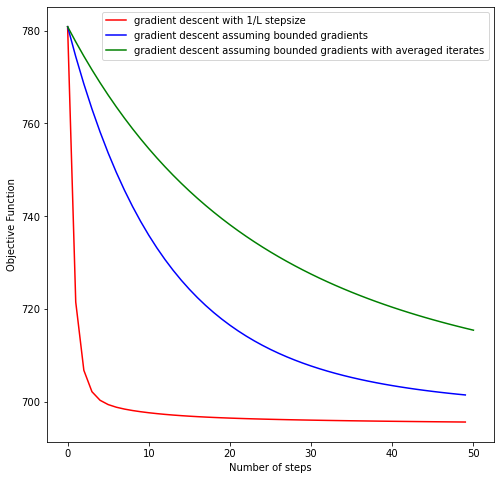

In [52]:
plt.figure(figsize=(8, 8))
plt.xlabel('Number of steps')
plt.ylabel('Objective Function')
#plt.yscale("log")
plt.plot(range(len(gradient_objectives)), gradient_objectives,'r', label='gradient descent with 1/L stepsize')
plt.plot(range(len(bd_gradient_objectives)), bd_gradient_objectives,'b', label='gradient descent assuming bounded gradients')
plt.plot(range(len(bd_gradient_objectives_averaged)), bd_gradient_objectives_averaged,'g', label='gradient descent assuming bounded gradients with averaged iterates')
plt.legend(loc='upper right')
plt.show()